<a href="https://colab.research.google.com/github/priyamvadatiwari/kaggledatasets-Airquality/blob/main/Imputation_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
#Q1: Read the airquality.csv data set.

df = pd.read_csv("airquality.csv")
df.head(20)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,56.0,5,5
5,28.0,NaN,14.9,66.0,5,6
6,23.0,299.0,8.6,65.0,5,7
7,19.0,99.0,13.8,59.0,5,8
8,8.0,19.0,NaN,NaN,5,9
9,NaN,194.0,8.6,69.0,5,10


In [6]:
#Q1.a:How many missing values are present for each variable?

df.isnull().sum()

Ozone      37
Solar.R     7
Wind       16
Temp        5
Month       0
Day         0
dtype: int64

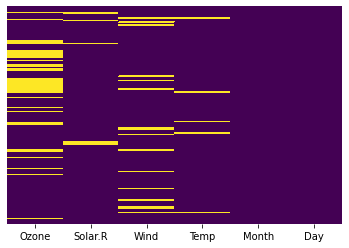

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#1b. Create a data frame of complete cases and find the mean temperature using listwise deletion
df2 = df.copy()

df2.dropna(axis = 0, how = 'any', inplace = True)

df2['Temp'].mean()

77.98958333333333

In [9]:
#1c. Find the mean temperature using pairwise deletion

df2.groupby((df2['Temp'])).mean()


,Ozone,Solar.R,Wind,Month,Day
Temp,,,,,
57.0,6.000000,78.000000,18.400000,5.000000,18.000000
58.0,18.000000,65.000000,13.200000,5.000000,15.000000
59.0,10.000000,53.500000,11.750000,5.000000,14.500000
61.0,18.000000,58.500000,10.850000,5.000000,23.500000
62.0,14.500000,178.500000,10.600000,5.000000,12.000000
63.0,14.000000,20.000000,16.600000,9.000000,25.000000
64.0,13.500000,286.000000,12.050000,7.000000,18.500000
65.0,21.500000,168.000000,8.900000,5.500000,12.500000
66.0,22.500000,298.500000,10.600000,5.000000,15.000000


In [10]:
#1d: Which rows contain missing temperature values?

df[df['Temp'].isnull()]

,Ozone,Solar.R,Wind,Temp,Month,Day
8,8.0,19.0,NaN,NaN,5,9
60,NaN,138.0,8.0,NaN,6,30
81,16.0,7.0,6.9,NaN,7,21
89,50.0,275.0,7.4,NaN,7,29
145,36.0,139.0,NaN,NaN,9,23


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


'There is a difference in the mean temperature because in the listwise deletion, \nit deletes the entire row which has the missing values for any column. \nThis could affect the Temperature column and its mean'

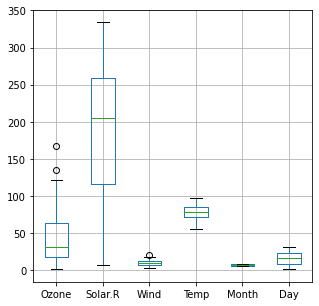

In [11]:
#1e:Create a box plot for the air quality data
df.boxplot(figsize = (5,5))

'''There is a difference in the mean temperature because in the listwise deletion, 
it deletes the entire row which has the missing values for any column. 
This could affect the Temperature column and its mean'''

In [13]:
#Check for any outliers (using the default 1.5 IQR setting)? 
#What are the ozone outlier values? Create a new data frame called ozone_complete 
#that has all rows with ozone outliers removed.

Q1=df['Ozone'].quantile(0.25)
Q3=df['Ozone'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
#Outlier values - Lower bound = -49.875 ; Upper bound = 131.125

ozone_complete = df[(df['Ozone'] > lower_bound) & (df['Ozone'] < upper_bound)]

-49.875 131.125


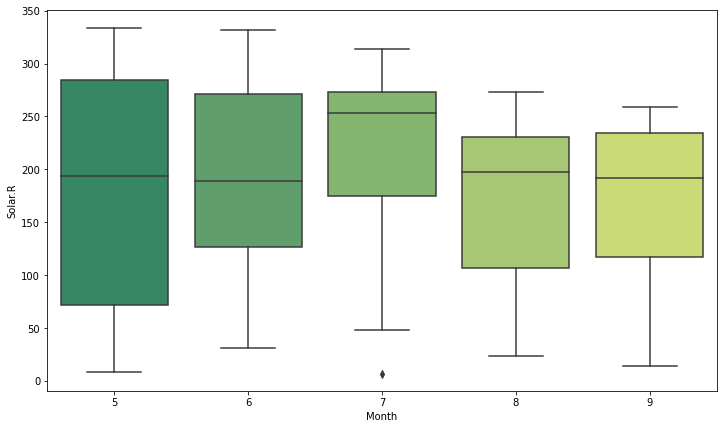

In [14]:
#a.  Create box plot

air_median= pd.read_csv("airquality.csv")

plt.figure(figsize=(12, 7))
sns.boxplot(x='Month',y='Solar.R',data=air_median,palette='summer')

In [15]:
median =air_median['Solar.R'].median()

def impute_R(cols):
    Solar = cols[0]
    
    if pd.isnull(Solar):
            return median

    else:
        return Solar
air_median['Solar.R'] = air_median[['Solar.R']].apply(impute_R,axis=1)

air_median['Solar.R'].head(10)


0    190.0
1    118.0
2    149.0
3    313.0
4    205.0
5    205.0
6    299.0
7     99.0
8     19.0
9    194.0
Name: Solar.R, dtype: float64

In [17]:
#Create a new data set called air_mean from the air_median data set. 
#Impute the missing temperature values with the mean temperature for the month that the temperature 
#is missing from in the air_mean data set. For example, impute missing month 5 temperature values 
#with the mean of the non-missing temperatures for month 5.

air_mean = air_median[['Temp', 'Month','Ozone','Wind']].copy()

air_mean.Temp[(air_mean.Temp.notnull()) & (air_mean.Month == 5)].mean()

# mean5_temp = air_mean.Temp[(air_mean.Temp.notnull()) & (air_mean.Month == 5)].mean()

# mean6_temp = air_mean.Temp[(air_mean.Temp.notnull()) & (air_mean.Month == 6)].mean()


65.7

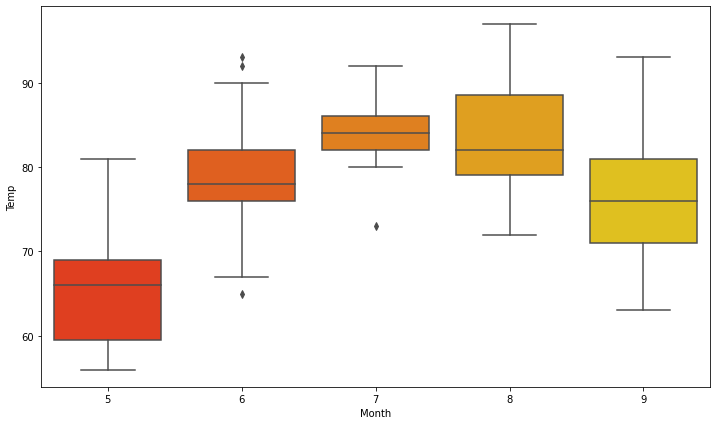

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Month',y='Temp',data=air_mean, palette='autumn')

In [19]:
#Caluclating mean for every month

df2=air_mean[air_mean['Month']==5]['Temp']
mean1 = df2.mean()

df3=air_mean[air_mean['Month']==6]['Temp']
mean2 = df3.mean()

df4=air_mean[air_mean['Month']==7]['Temp']
mean3 = df4.mean()

df5=air_mean[air_mean['Month']==8]['Temp']
mean4 = df5.mean()

df6=air_mean[air_mean['Month']==9]['Temp']
mean5 = df6.mean()

In [20]:
def impute_Temp(cols):
    Temp = cols[0]
    Month = cols[1]
    
    if pd.isnull(Temp):

        if Month == 5:
            return mean1

        elif Month == 6:
            return mean2
        elif Month == 7:
            return mean3
        elif Month == 8:
            return mean4
        
        else:
            return mean5

    else:
        return Temp

air_mean['Temp'] = air_mean[['Temp','Month']].apply(impute_Temp,axis=1)


air_mean.head(10)

,Temp,Month,Ozone,Wind
0,67.0,5,41.0,7.4
1,72.0,5,36.0,8.0
2,74.0,5,12.0,12.6
3,62.0,5,18.0,11.5
4,56.0,5,NaN,14.3
5,66.0,5,28.0,14.9
6,65.0,5,23.0,8.6
7,59.0,5,19.0,13.8
8,65.7,5,8.0,NaN
9,69.0,5,NaN,8.6


In [21]:
#2c:Create a new data set called air_ratio from the air_mean data set. 
#Impute the missing values of the Ozone variable using ratio imputation in the air_ratio data set 

air_ratio = air_mean[['Ozone', 'Month','Wind']].copy()

ozone_mean=air_ratio.groupby('Month')['Ozone'].mean()

unique=air_ratio.groupby('Month')['Ozone'].nunique()

ratio=unique/ozone_mean

ratio

Month
5    0.889251
6    0.305660
7    0.405986
8    0.400257
9    0.667763
Name: Ozone, dtype: float64

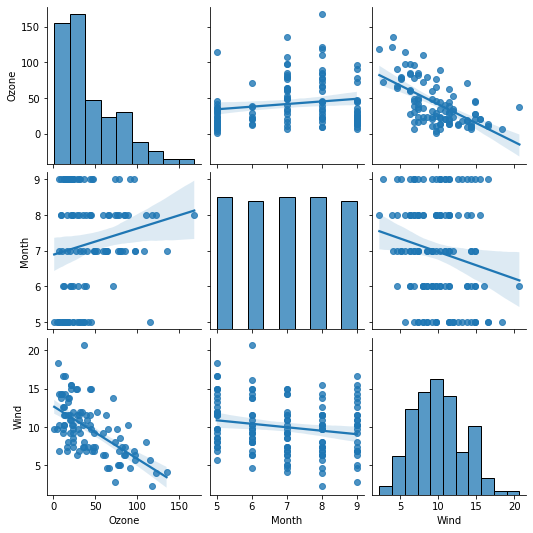

In [24]:
sns.pairplot(air_ratio, kind="reg", palette="Set2")
plt.show()

In [25]:
m1 = 0.889251
m2 = 0.305660
m3 = 0.405986
m4 = 0.400257
m5 = 0.667763

In [26]:
def impute_Ozone(cols):
    Ozone = cols[0]
    Month = cols[1]
    
    if pd.isnull(Ozone):

        if Month == 5:
            return m1

        elif Month == 6:
            return m2
        elif Month == 7:
            return m3
        elif Month == 8:
            return m4
        
        else:
            return m5

    else:
        return Ozone

air_ratio['Ozone'] = air_ratio[['Ozone','Month']].apply(impute_Temp,axis=1)


air_ratio.head(30)

,Ozone,Month,Wind
0,41.0,5,7.4
1,36.0,5,8.0
2,12.0,5,12.6
3,18.0,5,11.5
4,65.7,5,14.3
5,28.0,5,14.9
6,23.0,5,8.6
7,19.0,5,13.8
8,8.0,5,NaN
9,65.7,5,8.6


In [27]:
#2d:Create a new data set called air_complete from the air_ratio data set. 
#Use linear regression to impute the missing values of Wind using Ozone as 
#the independent variable in the air_complete data set.

air_complete = air_ratio[[ 'Ozone','Wind']].copy()
air_complete

,Ozone,Wind
0,41.000000,7.4
1,36.000000,8.0
2,12.000000,12.6
3,18.000000,11.5
4,65.700000,14.3
...,...,...
148,30.000000,6.9
149,76.758621,13.2
150,14.000000,14.3
151,18.000000,8.0


In [33]:
def random_imputation(air_ratio, Wind):

    data_missing = air_complete[Wind].isnull().sum()
    observed_values = air_complete.loc[air_complete[Wind].notnull(), Wind]
    air_complete.loc[air_complete[Wind].isnull(), Wind + '_imp'] = np.random.choice(observed_values, data_missing, replace = True)
    
    return air_complete

In [34]:
missing_columns = ['Wind']
for a in missing_columns:
    air_complete[a + '_imp'] = air_complete[a]
    air_complete = random_imputation(air_complete, a)

air_complete.head(20)

,Ozone,Wind,Wind_imp
0,41.0,7.400000,7.400000
1,36.0,8.000000,8.000000
2,12.0,12.600000,12.600000
3,18.0,11.500000,11.500000
4,65.7,14.300000,14.300000
5,28.0,14.900000,14.900000
6,23.0,8.600000,8.600000
7,19.0,13.800000,13.800000
8,8.0,11.929667,11.929667
9,65.7,8.600000,8.600000


In [35]:
#Other way of doing imputation is using scikit learn library importing Iterativeimputer. 

to_impute = air_complete[["Wind", "Ozone"]]
 

imp = IterativeImputer(max_iter=10, random_state=0)
 
imp.fit(to_impute)
imputed=imp.transform(to_impute)
imputed_to_df=pd.DataFrame(imputed)
imputed_to_df.columns=[["Wind", "Ozone"]]
 

# Replace the original values of the column wind with the new imputed values:

air_complete["Wind"] = imputed_to_df["Wind"]
 

# check:

air_complete.isnull().sum()

Ozone       0
Wind        0
Wind_imp    0
dtype: int64

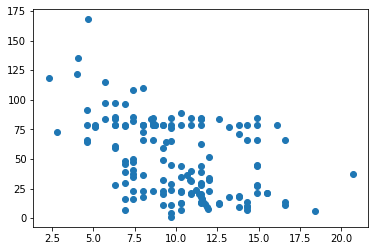

In [31]:
plt.scatter( air_complete['Wind'], air_complete['Ozone'])
plt.show()